In [6]:
from os import walk, path
import numpy as np
import mahotas as mh
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from PIL import Image

In [8]:
import os
os.getcwd()

'C:\\Users\\rubandyopadhyay\\Documents\\Python\\ML'

In [12]:
start_dir = "..\\8365OS_Final code\\8365OS_07_Codes\\"
my_dir = start_dir + "data\\att-faces\\orl_faces\\s1"
newname = my_dir + "\\" + "1.pgm.bmp"
img_data_1 = mh.imread(newname, as_grey=True)
(x, y) = img_data_1.shape
print(x*y)
print(x,y)

10304
(112, 92)


In [ ]:
X = []
y = []
start_dir = "..\8365OS_Final code\\8365OS_07_Codes\\"
walk_dir = start_dir + "data\\att-faces\\orl_faces\\"
for dir_path, dir_names, file_names in walk(walk_dir):
    for fn in file_names:
        if fn[-3:] == 'bmp':
            image_filename = path.join(dir_path, fn)
            print(image_filename)
            # imf = Image.open(image_filename)
            # newname = image_filename + ".bmp"
            # imf.save(newname)
            X.append(scale(mh.imread(image_filename, as_grey=True).reshape(10304).
                    astype('float32')))
            y.append(dir_path)
X = np.array(X)


In [19]:
print(X.shape)
print(len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y)
pca = PCA(n_components=150)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
print(X_train_reduced.shape, X_test_reduced.shape)
print('The original dimensions of the training data', X_train.shape)
print('The reduced dimensions of the training data', X_train_reduced.shape)


(400, 10304)
400
((300, 150), (100, 150))
('The original dimensions of the training data', (300, 10304))
('The reduced dimensions of the training data', (300, 150))


In [21]:
classifier = LogisticRegression()
accuracies = cross_val_score(classifier, X_train_reduced, y_train)
print('Cross validation accuracy:', np.mean(accuracies), accuracies)
classifier.fit(X_train_reduced, y_train)
predictions = classifier.predict(X_test_reduced)
print(classification_report(y_test, predictions))


('Cross validation accuracy:', 0.83705044545752505, array([ 0.83185841,  0.83838384,  0.84090909]))
             precision    recall  f1-score   support

..\8365OS_Final code\8365OS_07_Codes\data\att-faces\orl_faces\s1       1.00      0.50      0.67         2
..\8365OS_Final code\8365OS_07_Codes\data\att-faces\orl_faces\s10       1.00      1.00      1.00         2
..\8365OS_Final code\8365OS_07_Codes\data\att-faces\orl_faces\s12       1.00      1.00      1.00         4
..\8365OS_Final code\8365OS_07_Codes\data\att-faces\orl_faces\s13       0.67      1.00      0.80         2
..\8365OS_Final code\8365OS_07_Codes\data\att-faces\orl_faces\s14       1.00      0.75      0.86         4
..\8365OS_Final code\8365OS_07_Codes\data\att-faces\orl_faces\s15       1.00      1.00      1.00         3
..\8365OS_Final code\8365OS_07_Codes\data\att-faces\orl_faces\s16       1.00      0.75      0.86         4
..\8365OS_Final code\8365OS_07_Codes\data\att-faces\orl_faces\s17       1.00      1.00      1.00  

In [71]:
np.mean(y_test == predictions)
y_test == predictions.ravel()
probs = classifier.predict_proba(X_test_reduced)
import operator
sorted([(i, v) for i,v in enumerate(probs[0])], key=operator.itemgetter(1), reverse=True)
print(y_test != predictions.ravel())
np.where(y_test != predictions.ravel())
print(sorted([(i, v) for i,v in enumerate(probs[9])], key=operator.itemgetter(1), reverse=True))
# print(classifier.classes_)
print()
print("First Choice: " + classifier.classes_[19])
print("Second Choice: " + classifier.classes_[17])
print("Predicted: " + predictions[9])
print("Actual: " + y_test[9])
print(classifier.classes_ == y_test[9])

[False False False False False False False False False  True False False
 False False False False False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False  True False False False False
 False False False False]
[(19, 0.1457267706139721), (17, 0.13998551103540396), (0, 0.070609981150858037), (21, 0.068402984507014292), (14, 0.063719113086835574), (23, 0.057598779538439691), (4, 0.048381238364807774), (35, 0.045635820212226362), (7, 0.041217503357642564), (32, 0.032623384683982536), (2, 0.031382264615418647), (26, 0.027780960050709212), (22, 0.02689562398278468), (1, 0.024700088995388333), (10, 0

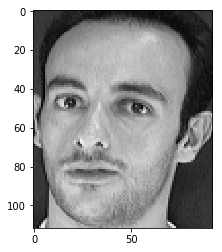

In [66]:
%matplotlib inline
from PIL import Image
from pylab import imshow, show

imshow(X_test[9].reshape(112, 92), cmap='gray')

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary = "a list of words I want to look for in the documents".split()
vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', 
           stop_words='english', vocabulary=vocabulary)

doc = ["some string I want to get tf-idf vector for", "list of words"]
tfidf = vect.fit(doc)
trf = vect.transform(doc)
print(trf)
trf.toarray()

  (0, 5)	1.0
  (1, 3)	0.707106781187
  (1, 1)	0.707106781187


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.70710678,  0.        ,  0.70710678,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [93]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 


In [99]:
doc1 = "The new travel ban comes six weeks after Trump's original executive order was rolled out to chaos and confusion at airports nationwide, and eventually blocked by a federal court."
wnl = WordNetLemmatizer()
word_tokenize(doc1)
[wnl.lemmatize(t) for t in word_tokenize(doc1)]

['The',
 'new',
 'travel',
 'ban',
 u'come',
 'six',
 u'week',
 'after',
 'Trump',
 "'s",
 'original',
 'executive',
 'order',
 u'wa',
 'rolled',
 'out',
 'to',
 'chaos',
 'and',
 'confusion',
 'at',
 u'airport',
 'nationwide',
 ',',
 'and',
 'eventually',
 'blocked',
 'by',
 'a',
 'federal',
 'court',
 '.']

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)
corpus = [
     'This is the first document.',
     'This is the second second document.',
     'And the third one.',
     'Is this the first document?',
]
X = vectorizer.fit_transform(corpus)
# print(X) 
print(X)
X.toarray()

  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	1
  (1, 5)	2
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1


array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [110]:
from scipy.sparse import csr_matrix

docs = [["hello", "world", "hello"], ["goodbye", "cruel", "world"]]
indptr = [0]
indices = []
data = []
vocabulary = {}
for d in docs:
    for term in d:
        index = vocabulary.setdefault(term, len(vocabulary))
        indices.append(index)
        data.append(1)
    indptr.append(len(indices))

print(data)
print(indices)
print(indptr)
csr_matrix((data, indices, indptr), dtype=int).toarray()

[1, 1, 1, 1, 1, 1]
[0, 1, 0, 2, 3, 1]
[0, 3, 6]


array([[2, 1, 0, 0],
       [0, 1, 1, 1]])

In [117]:
import xml.etree.ElementTree
from xml.dom import minidom

In [249]:
# help(xml.etree.ElementTree)
dir(minidom)
xmldata = """
<data>
    <items type="1">
        <item name="item1" stype="100"></item>
        <item name="item2"></item>
        <item name="item3"></item>
        <item name="item4"></item>
    </items>
    <items type="2">
        <item name="item5" xxx="YYY">Test Data</item>
        <item name="item6"></item>
        <item name="item7"></item>
        <item name="item8"></item>
    </items>
</data>
"""
parsed = minidom.parseString(xmldata)
dir(parsed)
items = parsed.getElementsByTagName('items')
for item in items:
    print(item.attributes["type"].value)
    for i in item.childNodes:
        i1 = i.firstChild
        if i1:
            print(i1.nodeValue)
        if i.attributes:
            print(dict(i.attributes.items()))
        print("----")
        # print(dir(i))


1
----
{u'name': u'item1', u'stype': u'100'}
----
----
{u'name': u'item2'}
----
----
{u'name': u'item3'}
----
----
{u'name': u'item4'}
----
----
2
----
Test Data
{u'xxx': u'YYY', u'name': u'item5'}
----
----
{u'name': u'item6'}
----
----
{u'name': u'item7'}
----
----
{u'name': u'item8'}
----
----


In [259]:
import xml.sax

class MyHandler(xml.sax.handler.ContentHandler):
    def __init__(self):
        self._charBuffer = []
        self._result = []

    def _getCharacterData(self):
        data = ''.join(self._charBuffer).strip()
        self._charBuffer = []
        return data.strip() #remove strip() if whitespace is important

    def parse(self, f):
        xml.sax.parse(f, self)
        return self._result

    def characters(self, data):
        self._charBuffer.append(data)

    def startElement(self, name, attrs):
        if attrs:
            print("attrs for %s = %s" % (name, attrs.items()))
        if name == 'job': self._result.append({})

    def endElement(self, name):
        if not name == 'job': self._result[-1][name] = self._getCharacterData()

jobs = MyHandler().parse("job-file.xml") #a list of all jobs
jobs


attrs for div = [(u'class', u'descriptionheader')]
attrs for P = [(u'STYLE', u'margin-top:0px;margin-bottom:0px')]
attrs for SPAN = [(u'STYLE', u'font-family:Arial;font-size:small')]
attrs for div = [(u'class', u'qualificationsheader')]
attrs for UL = [(u'STYLE', u'list-style-type:disc')]


[{u'LI': u'PALS required upon hire',
  u'P': '',
  u'SPAN': u'Utilizing the standards set forth for Nursing Practice by the ANA and ONS, the RN will organize, modify, evaluate, document and maintain the plan of care for Epilepsy and/or Neurological patients. It will include individualized, family centered, holistic, supportive, and safe age-specific care.',
  u'UL': u'',
  u'address': u'7777 Forest Lane',
  u'city': u'Dallas',
  u'company': u'',
  u'country': u'US',
  u'description': u'',
  u'detail-url': u'http://search.careers-hcanorthtexas.com/s/Job-Details/Registered-Nurse-Epilepsy-Job/Medical-City/xjdp-cl289619-jf120-ct2181-jid4041800?s_cid=Advance',
  u'div': u'Qualifications',
  u'job-category': u'Neuroscience Nursing',
  u'job-code': u'881723',
  u'location': u'',
  u'name': u'Medical City (Dallas, TX)',
  u'posted-date': u'2012-07-26',
  u'state': u'TX',
  u'summary': u'',
  u'title': u'Registered Nurse-Epilepsy',
  u'url': u'http://www.hcanorthtexas.com/careers/search-jobs.do